In [12]:
import pandas as pd

In [63]:
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [74]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
import requests
from bs4 import BeautifulSoup

# 크롤링 & DF 전처리

In [19]:
url = "https://soco.seoul.go.kr/youth/pgm/home/yohome/maplist.json"
head = {"User-Agent":
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}
response = requests.post(url, headers= head)
ansim = response.json()

In [20]:
ansim_df = pd.DataFrame(ansim['mapResultList'])

In [21]:
ansim_df

,rnum,homeCode,mainImgAtchFileId,mainImgAtchFileSeq,adresSi,adresGu,adresRo,adres,adresDetail,homeName,totArea,totFloor,totPeople,optionSubway,presale,presaleNm,movinTerms,movinHoman,houseSupplyNm,managerComp,moneyDeposit,moneyDepositLow,moneyRentalLow,tradPrice,scaleTot,managerPhone,homepage,fnMoneyDeposit,fnMoneyDepositLow,fnMoneyDepositHigh,fnMoneyRentalLow,fnMoneyRentalHigh,fnTradPrice,statusCnt,roomTotArea,regDate,xpos,ypos,houseStrut,subwayLineCd,fileId,fileSn
0,1,20000525,None,None,서울,은평구,불광동 323-21,은평구 불광동 323-21,연신내역 루체스테이션,연신내역 루체스테이션,None,None,NaN,"3호선, 6호선 연신내역 3번출구 148m",C,월세,None,제한없음,None,(주)위드웰에셋,None,40000000.0,260000.0,None,264,02-356-7108,https://lucestation.com,-6502,4천0만,1억1천0만,26만,67만,-6502,0,17.05,1700182723000,126.9231504,37.6186684,None,"03,06",d12b3eb119184b4899ec0254d0ab4bb8,1
1,2,20000540,None,None,서울,은평구,갈현동 456-25,은평구 갈현동 456-25,THE STUDIO 163,연신내역 THE STUDIO 163,None,None,NaN,"3호선, 6호선 연신내역 5번출구 236m",C,월세,None,제한없음,None,THE STUDIO 163,None,40000000.0,290000.0,None,163,02-564-4866,http://www.thestudio163.co.kr,-6502,4천0만,8천6백0만,29만,53만,-6502,0,17A,1712125695000,126.9190859,37.6179079,None,"03,06",16d932a39bb04b9cae0ca3653aa07108,1
2,3,20000537,None,None,서울,중랑구,상봉동 118-8,중랑구 상봉동 118-8,상봉동양엔파트,상봉역 상봉동양엔파트,None,None,NaN,"7호선, 경의중앙선, 경춘선 상봉역 5번출구 240m",C,월세,None,제한없음,None,상봉동양엔파트,None,43000000.0,280000.0,None,299,02-493-1006,https://sbnpart.co.kr/index.php,-6502,4천3백0만,1억3천2백0만,28만,76만,-6502,0,18.03(18A),1711088694000,127.0822135,37.5950616,None,"07,12,14",01dccb9cec424549b0f6b671b3e69887,1
3,4,20000366,None,None,서울,중랑구,봉우재로 111,중랑구 봉우재로 111,제이스타상봉,상봉역 제이스타상봉,None,None,0.0,"7호선, 경의중앙선, 경춘선 상봉역 4번출구 324m",C,월세,None,제한없음,None,대원교역상사,None,36000000.0,300000.0,None,83,02-537-4102,https://jstar2030.modoo.at,-6502,3천6백0만,7천6백0만,30만,60만,-6502,0,17.02,1646875909000,127.0852776,37.5926916,None,"07,12,14",73758eda9e5d4d389892785146e89c3b,11
4,5,20000373,None,None,서울,은평구,서오릉로 165,은평구 서오릉로 165,구산주택,구산역 구산주택,None,None,238.0,6호선 구산역 4번출구 258m,C,월세,None,제한없음,None,(주)덕영,None,36000000.0,290000.0,None,238,010-4744-8798,https://duckyoung2016.com/,-6502,3천6백0만,9천1백0만,29만,67만,-6502,0,17A,1649731442000,126.9150401,37.6122404,None,06,209a14a71d2d41f081b06440ae961a4a,29
5,6,20000531,None,None,서울,동작구,노량진동 54-1,동작구 노량진동 54-1,더써밋타워,노량진역 더써밋타워,None,None,NaN,"1호선, 9호선 노량진역 4번출구 40m",C,월세,None,제한없음,None,코레이트노량진역유한회사,None,45000000.0,310000.0,None,299,02-823-5410,https://thesummittower.co.kr/,-6502,4천5백0만,1억9천1백0만,31만,1백0만6만,-6502,0,17.78C,1707093977000,126.9407288,37.5131814,None,"01,09",4ed6311ac1194a6cbe37ff21b81b1041,10
6,7,20000526,None,None,서울시,동작구,대방동 403-14,동작구 대방동 403-14,골든노블레스,신대방삼거리역 골든노블레스,None,None,NaN,신대방삼거리역 3번 출구에서 227m,C,월세,None,제한없음,None,이영희 외 3인,None,34000000.0,240000.0,None,110,070-7609-0100,https://www.db40314.kr/,-6502,3천4백0만,1억2천8백0만,24만,73만,-6502,0,18A,1702259696000,None,None,None,07,b0550f46b6db458daa123d5b77edaf58,1
7,8,20000529,None,None,서울,송파구,문정동 55-6,송파구 문정동 55-6,문정역 마에스트로,문정역 마에스트로,None,None,NaN,8호선 문정역 2번출구 180m,C,월세,None,제한없음,None,문정역마에스트로프로젝트,None,42000000.0,360000.0,None,438,02-3453-9655,https://maestromunjeong.com,-6502,4천2백0만,1억1천6백0만,36만,86만,-6502,0,16A,1704861920000,127.1230586,37.4863628,None,08,920c57725cbe4855b5722e87f81cbab3,1
8,9,20000495,None,None,서울,송파구,잠실동 187-10,송파구 잠실동 187-10,잠실 센트럴파크,잠실새내역 잠실센트럴파크,None,None,NaN,2호선 잠실새내역 4번출구 301m,C,월세,None,제한없음,None,허남이,None,46000000.0,330000.0,None,217,02-6479-2130,https://jamsilcentralpark.com/,-6502,4천6백0만,1억7천7백0만,33만,1백0만3만,-6502,0,17A,1686289148000,127.0834603,37.5106259,None,02,8d211fa30bed4e1aae0d6d475a6a351a,12
9,10,20000358,None,None,서울특별시,성동구,천호대로416,"성동구 천호대로416 (용답동, 힐데스하임)",힐데스하임(U-삼진랜드),장한평역 힐데스하임(U-삼진랜드),None,None,170.0,5호선 장한평역 5번출구 16m,C,월세,None,제한없음,None,성부경,None,38000000.0,340000.0,None,170,010-5064-0016,없음,-6502,3천8백0만,8천0만,34만,63만,-6502,0,14,1646873528000,127.0651008,37.5609927,None,05,fc8d08def9ff40ba9785ee7be96c1acc,21


In [22]:
ansim_df.head(1)

,rnum,homeCode,mainImgAtchFileId,mainImgAtchFileSeq,adresSi,adresGu,adresRo,adres,adresDetail,homeName,totArea,totFloor,totPeople,optionSubway,presale,presaleNm,movinTerms,movinHoman,houseSupplyNm,managerComp,moneyDeposit,moneyDepositLow,moneyRentalLow,tradPrice,scaleTot,managerPhone,homepage,fnMoneyDeposit,fnMoneyDepositLow,fnMoneyDepositHigh,fnMoneyRentalLow,fnMoneyRentalHigh,fnTradPrice,statusCnt,roomTotArea,regDate,xpos,ypos,houseStrut,subwayLineCd,fileId,fileSn
0,1,20000525,None,None,서울,은평구,불광동 323-21,은평구 불광동 323-21,연신내역 루체스테이션,연신내역 루체스테이션,None,None,NaN,"3호선, 6호선 연신내역 3번출구 148m",C,월세,None,제한없음,None,(주)위드웰에셋,None,40000000.0,260000.0,None,264,02-356-7108,https://lucestation.com,-6502,4천0만,1억1천0만,26만,67만,-6502,0,17.05,1700182723000,126.9231504,37.6186684,None,"03,06",d12b3eb119184b4899ec0254d0ab4bb8,1


In [23]:
ansim_df.columns

Index(['rnum', 'homeCode', 'mainImgAtchFileId', 'mainImgAtchFileSeq',
       'adresSi', 'adresGu', 'adresRo', 'adres', 'adresDetail', 'homeName',
       'totArea', 'totFloor', 'totPeople', 'optionSubway', 'presale',
       'presaleNm', 'movinTerms', 'movinHoman', 'houseSupplyNm', 'managerComp',
       'moneyDeposit', 'moneyDepositLow', 'moneyRentalLow', 'tradPrice',
       'scaleTot', 'managerPhone', 'homepage', 'fnMoneyDeposit',
       'fnMoneyDepositLow', 'fnMoneyDepositHigh', 'fnMoneyRentalLow',
       'fnMoneyRentalHigh', 'fnTradPrice', 'statusCnt', 'roomTotArea',
       'regDate', 'xpos', 'ypos', 'houseStrut', 'subwayLineCd', 'fileId',
       'fileSn'],
      dtype='object')

In [24]:
select_col = ['adresGu','adresRo', 'scaleTot','roomTotArea','moneyRentalLow','moneyDepositLow',
       'fnMoneyDepositLow', 'fnMoneyDepositHigh', 'fnMoneyRentalLow',
       'fnMoneyRentalHigh']

In [25]:
ansim2 = ansim_df[select_col]

In [26]:
ansim2

,adresGu,adresRo,scaleTot,roomTotArea,moneyRentalLow,moneyDepositLow,fnMoneyDepositLow,fnMoneyDepositHigh,fnMoneyRentalLow,fnMoneyRentalHigh
0,은평구,불광동 323-21,264,17.05,260000.0,40000000.0,4천0만,1억1천0만,26만,67만
1,은평구,갈현동 456-25,163,17A,290000.0,40000000.0,4천0만,8천6백0만,29만,53만
2,중랑구,상봉동 118-8,299,18.03(18A),280000.0,43000000.0,4천3백0만,1억3천2백0만,28만,76만
3,중랑구,봉우재로 111,83,17.02,300000.0,36000000.0,3천6백0만,7천6백0만,30만,60만
4,은평구,서오릉로 165,238,17A,290000.0,36000000.0,3천6백0만,9천1백0만,29만,67만
5,동작구,노량진동 54-1,299,17.78C,310000.0,45000000.0,4천5백0만,1억9천1백0만,31만,1백0만6만
6,동작구,대방동 403-14,110,18A,240000.0,34000000.0,3천4백0만,1억2천8백0만,24만,73만
7,송파구,문정동 55-6,438,16A,360000.0,42000000.0,4천2백0만,1억1천6백0만,36만,86만
8,송파구,잠실동 187-10,217,17A,330000.0,46000000.0,4천6백0만,1억7천7백0만,33만,1백0만3만
9,성동구,천호대로416,170,14,340000.0,38000000.0,3천8백0만,8천0만,34만,63만


In [27]:
a = ansim2['roomTotArea'].tolist()

In [28]:
a

['17.05',
 '17A',
 '18.03(18A)',
 '17.02',
 '17A',
 '17.78C',
 '18A',
 '16A',
 '17A',
 '14',
 '20',
 '17-A2,A3',
 '17(APT형)',
 '16',
 '14A',
 '17',
 '15A',
 '17',
 '17',
 '20',
 '16',
 '16A',
 '15.51',
 '16.3',
 '16',
 'A-15.33',
 '16',
 '16.12',
 '20.08',
 '15A',
 '15',
 '17A',
 '14A',
 '17',
 '14A',
 '16.63',
 '19',
 '15.73',
 '15A',
 '14D',
 '14.35A',
 '18',
 '17',
 '15',
 '17A',
 '16',
 '16A',
 '14A',
 '17',
 '16A']

In [29]:
import re

# 주어진 리스트
data_list = a

# 알파벳만을 제거하는 정규식 패턴
pattern = re.compile(r'[A-Za-z]+')
# 괄호와 괄호 안에 있는 내용을 지우는 정규식 패턴
pattern2 = re.compile(r'\(.*?\)')

result_list = [re.sub(pattern, '', value) for value in data_list]
# 리스트 컴프리헨션을 사용하여 각 값에서 괄호와 그 안에 있는 내용을 제거
result_list = [re.sub(pattern2, '', value) for value in result_list]

# 결과 출력
print(result_list)

['17.05', '17', '18.03', '17.02', '17', '17.78', '18', '16', '17', '14', '20', '17-2,3', '17', '16', '14', '17', '15', '17', '17', '20', '16', '16', '15.51', '16.3', '16', '-15.33', '16', '16.12', '20.08', '15', '15', '17', '14', '17', '14', '16.63', '19', '15.73', '15', '14', '14.35', '18', '17', '15', '17', '16', '16', '14', '17', '16']


In [30]:
print(result_list.index('17-2,3'))
print(result_list.index('-15.33'))

11
25


In [31]:
result_list[10] = 17
result_list[25] = 15.33

In [32]:
ansim2['roomTotArea'] = result_list

/tmp/ipykernel_29209/3806975381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ansim2['roomTotArea'] = result_list


In [33]:
ansim2['roomTotArea'] = ansim2['roomTotArea'].astype(float)

ValueError: could not convert string to float: '17-2,3'

In [ ]:
ansim2

In [ ]:
ansim2[ansim2['moneyDepositLow'].isnull()]

In [ ]:
ansim2.drop(14, axis=0,inplace = True)

In [ ]:
ansim2

In [ ]:
ansim2['fnMoneyRentalLow'][12] = '62000'

In [ ]:
# 리스트 컴프리헨션을 사용하여 각 문자열에서 'a'를 'x'로 바꾸기
ansim2['fnMoneyRentalLow'] = [''.join(['0000' if char == '만' else char for char in word]) for word in ansim2['fnMoneyRentalLow']]

In [ ]:
ansim2

In [ ]:
ansim2['fnMoneyRentalHigh']

In [ ]:
ansim2['fnMoneyRentalHigh'][4] = '1060000'
ansim2['fnMoneyRentalHigh'][7] = '1030000'
ansim2['fnMoneyRentalHigh'][12] = '476000'
ansim2['fnMoneyRentalHigh'][42] = '1120000'

In [ ]:
# 리스트 컴프리헨션을 사용하여 각 문자열에서 'a'를 'x'로 바꾸기
ansim2['fnMoneyRentalHigh'] = [''.join(['0000' if char == '만' else char for char in word]) for word in ansim2['fnMoneyRentalHigh']]

In [ ]:
ansim2

In [ ]:
ansim2['fnMoneyDepositLow']

In [ ]:
# 주어진 리스트
a = ansim2['fnMoneyDepositLow'].tolist()
b = ansim2['fnMoneyDepositHigh'].tolist()

# '백0만'을 '백만'으로, '천0만'을 '천만'으로 바꾸는 함수
def replace_baek(word):
    return word.replace('백0만', '백만').replace('천0만', '천만')

# 각 문자열에서 '백0만'을 '백만'으로, '천0만'을 '천만'으로 바꾸기
new_list = [replace_baek(word) for word in a]
new_list2 = [replace_baek(word) for word in b]

# 결과 출력
print(new_list)

ansim2['fnMoneyDepositLow'] = new_list
ansim2['fnMoneyDepositHigh'] = new_list2

In [ ]:
ansim2

In [ ]:
c = ansim2['fnMoneyDepositLow'].tolist()
d = ansim2['fnMoneyDepositHigh'].tolist()

In [ ]:
import re

# 주어진 문자열 리스트
strings = ['4천만', '4천3백만', '3천6백만', '1억9천1백만']

# 정규식 패턴 정의
pattern = re.compile(r'(\d+)(천|백|만|억)?')

# 문자열을 숫자로 변환하는 함수
def convert_to_number(word):
    number = 0
    matches = pattern.findall(word)
    for match in matches:
        digit = int(match[0])
        unit = match[1]
        if unit == '천':
            digit *= 10000000
        elif unit == '백':
            digit *= 1000000
        elif unit == '만':
            digit *= 10000
        elif unit == '억':
            digit *= 100000000  # 억 단위는 1억 = 1e8
        else:
            digit *= 1
        number += digit
    return number

# 각 문자열을 숫자로 변환하여 리스트 생성
new_list = [convert_to_number(word) for word in c]
new_list2 = [convert_to_number(word) for word in d]

# 결과 출력
print(new_list)


In [ ]:
ansim2['fnMoneyDepositLow'] = new_list
ansim2['fnMoneyDepositHigh'] = new_list2

In [ ]:
ansim2

In [ ]:
ansim2[['moneyDepositLow', 'fnMoneyRentalLow','fnMoneyRentalHigh','roomTotArea','moneyRentalLow']] \
= ansim2[['moneyDepositLow', 'fnMoneyRentalLow','fnMoneyRentalHigh','roomTotArea','moneyRentalLow']].astype(int)

In [ ]:
ansim2.info()

In [ ]:
ansim2['kindRental']='청년안심'

In [ ]:
ansim2['kindHouse']='아파트'

In [ ]:
ansim2

In [ ]:
ansim2 = ansim2[['kindRental', 'adresGu', 'adresRo', 'scaleTot', 'kindHouse', 'roomTotArea', 'moneyRentalLow', 'moneyDepositLow',
       'fnMoneyDepositLow', 'fnMoneyDepositHigh', 'fnMoneyRentalLow',
       'fnMoneyRentalHigh']]

In [91]:
import pymysql

In [92]:
import pymysql
import pandas as pd
con = pymysql.connect(host='13.125.65.37', user='encore1', password='EnCore1!@#', db='encore1', charset='utf8')
cur = con.cursor()

In [93]:
sql = """
INSERT INTO ansim VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

In [ ]:
ansim2 = ansim2.reset_index(drop=True)

In [ ]:
for i in range(len(ansim2)):
    cur.execute(sql, ansim2.iloc[i].tolist())

In [ ]:
con.commit()

In [ ]:
con.close()

In [ ]:
ansim2.head()

# EDA

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
import warnings
warnings.filterwarnings(action='ignore')

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [94]:
all_ansim = pd.read_sql_query("SELECT * FROM ansim", con=con)
all_rent = pd.read_sql_query("SELECT * FROM allRent", con=con)

lh = pd.read_sql_query("SELECT * FROM allLhView", con=con)
ansim = pd.read_sql_query("SELECT * FROM ansimView", con=con)
apt = pd.read_sql_query("SELECT * FROM apart_allRentView", con=con)
nonapt = pd.read_sql_query("SELECT * FROM notapart_allRentView", con=con)

avg_ansim = pd.read_sql_query("SELECT * FROM AverageAnsim", con=con)
avg_lh = pd.read_sql_query("SELECT * FROM AverageGu", con=con)

In [41]:
pd.options.display.float_format = '{:.5f}'.format

In [88]:
display(all_ansim.head(1))
display(lh.head(1))
display(ansim.head(1))
display(apt.head(1))
display(nonapt.head(1))
display(avg_lh.head(1))
display(avg_ansim.head(1))

,kindRental,adresGu,adresWay,scaleTot,kindHouse,totArea,publicmoneyRental,publicdepositMoney,privateMoneyDepositLow,privateMoneyDepositHigh,privateMoneyRentalLow,privateMoneyRentalHigh
0,청년안심,은평구,갈현동 456-25,163,아파트,17,290000,40000000,40000000,86000000,290000,530000


,kindRental,adresGu,adresWay,scaleTot,kindHouse,totArea,depositMoney,rentalMoney,alldeposit
0,매입임대,종로구,서울특별시 종로구 난계로29길 13,103,오피스텔,23,2000000,383117,90411615


,ren_type,kindRental,adresGu,adresWay,moneyRental,depositMoney,alldeposit,totArea
0,public,청년안심,은평구,갈현동 456-25,290000,40000000,106923076.92310,17


,kindRental,adresGu,Average
0,아파트,송파구,252483458.00000


,kindRental,adresGu,Average
0,비아파트,강남구,206069119.00000


,kindRental,adresGu,Average
0,매입임대,종로구,64546627


,kindRental,adresGu,Average
0,공공청년안심,은평구,96653846


In [45]:
ansim['totArea'] = all_ansim['totArea']

In [70]:
avg_ansim.head(3)

,kindRental,adresGu,Average
0,공공청년안심,은평구,96653846
1,공공청년안심,중랑구,99442821
2,공공청년안심,동작구,87346667


Text(0.5, 1.0, '안심주택 구분별 평균 임대료')

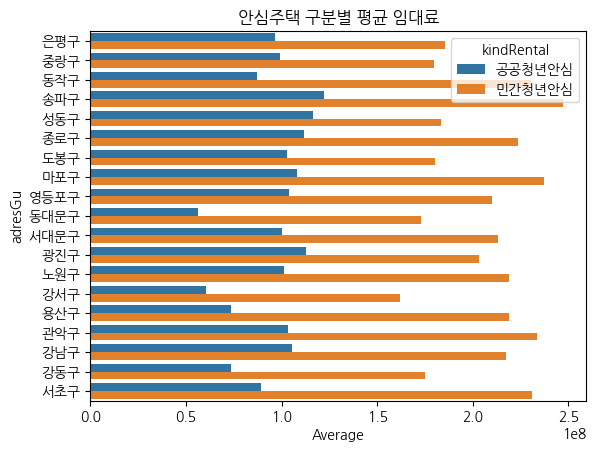

In [73]:
sns.barplot(data=avg_ansim, x='Average', y='adresGu', hue='kindRental')
plt.title('안심주택 구분별 평균 임대료')

In [49]:
apt['kindRental'] = '아파트'
nonapt['kindRental'] = '비아파트'

In [50]:
apt = apt[['kindRental', '자치구', '전세가']]

In [51]:
nonapt = nonapt[['kindRental', '자치구', '전세가']]

In [52]:
avg_ansim.loc[avg_ansim['ren_type'] == 'public', 'ren_type'] = '공공청년안심'
avg_ansim.loc[avg_ansim['ren_type'] == 'private', 'ren_type'] = '민간청년안심'

In [53]:
avg_ansim.drop(columns='kindRental', inplace=True)

In [58]:
# 컬럼명 통일
avg_ansim.rename(columns={'ren_type':'kindRental'}, inplace=True)
apt.rename(columns={'자치구':'adresGu', '전세가':'Average'}, inplace=True)
nonapt.rename(columns={'자치구':'adresGu', '전세가':'Average'}, inplace=True)

In [59]:
df_avg = pd.concat([avg_ansim, avg_lh, apt, nonapt])

In [77]:
df_avg_mean = df_avg.groupby(['kindRental'], as_index=False)['Average'].agg(['mean'])
df_avg_mean

,kindRental,mean
0,공공청년안심,95964804.36842
1,매입임대,60545843.80000
2,민간청년안심,206456707.21053
3,비아파트,156422597.48000
4,아파트,179416617.40000
5,행복주택,170741055.37500


Text(0.5, 1.0, '임대주체별 평균 가격')

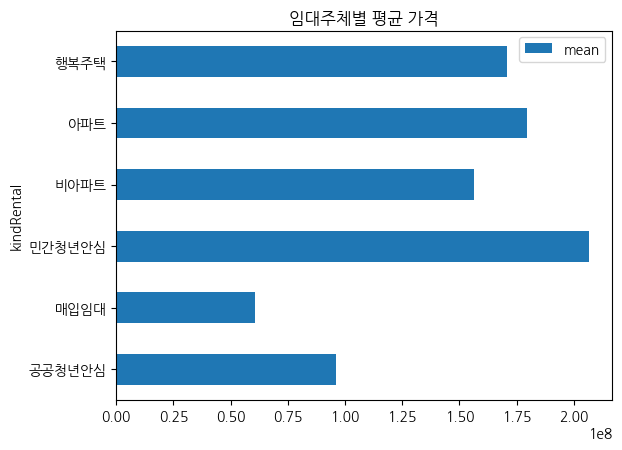

In [67]:
ax = df_avg_mean.plot.barh(x='kindRental')
ax.set_title('임대주체별 평균 가격')

In [96]:
df_avg.head()

,kindRental,adresGu,Average
0,공공청년안심,은평구,96653846.00000
1,공공청년안심,중랑구,99442821.00000
2,공공청년안심,동작구,87346667.00000
3,공공청년안심,송파구,122333333.00000
4,공공청년안심,성동구,116461538.00000


In [79]:
df_avg_mean = df_avg.groupby(['adresGu','kindRental'], as_index=False)['Average'].agg(['mean'])
df_avg_mean

,adresGu,kindRental,mean
0,강남구,공공청년안심,105260769.00000
1,강남구,매입임대,74748521.00000
2,강남구,민간청년안심,217568462.00000
3,강남구,비아파트,206069119.00000
4,강남구,아파트,229952591.00000
...,...,...,...
132,중랑구,매입임대,58128947.00000
133,중랑구,민간청년안심,179442821.00000
134,중랑구,비아파트,148309596.00000
135,중랑구,아파트,162562623.00000


Text(0.5, 1.0, '주택공급자별 평균 임대료')

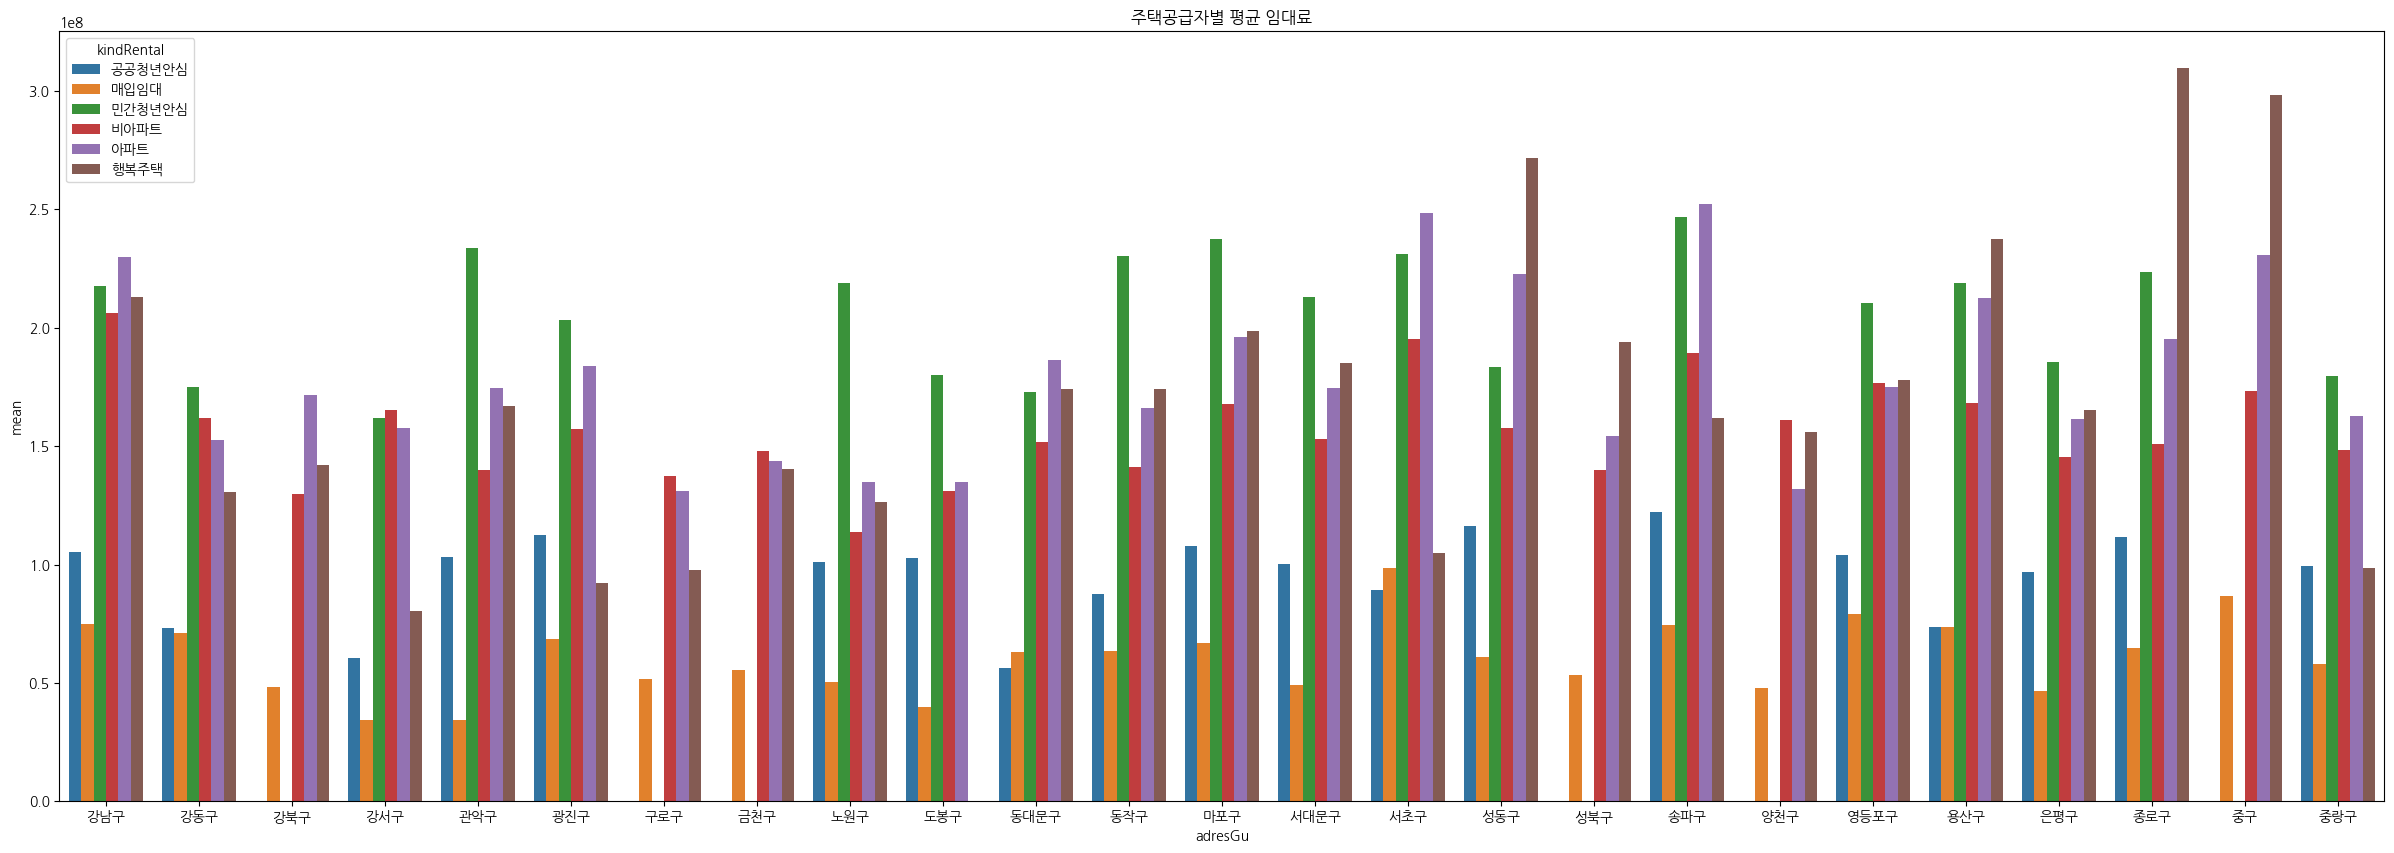

In [87]:
plt.figure(figsize=(30, 10))
sns.barplot(data=df_avg_mean, x='adresGu', y='mean', hue='kindRental')
plt.title('주택공급자별 평균 임대료')

## 성동구, 성북구, 용산구, 종로구, 중구는 행복주택의 임대료가 가장 비싸다
## 관악구 민간청년안심주택이 비싸다 --> 관악구 기존 아파트 입지 대비 역세권+신축으로 입지가 매우 좋아서 그럴 수 있음. 

## 행복주택 VS 아파트 시세 비교 

In [104]:
df_avg_rental = df_avg.groupby(['kindRental'], as_index=False)['Average'].agg(['mean'])
df_avg_mean
#sns.barplot(df['kindRental'])

,adresGu,kindRental,mean
0,강남구,공공청년안심,105260769.00000
1,강남구,매입임대,74748521.00000
2,강남구,민간청년안심,217568462.00000
3,강남구,비아파트,206069119.00000
4,강남구,아파트,229952591.00000
...,...,...,...
132,중랑구,매입임대,58128947.00000
133,중랑구,민간청년안심,179442821.00000
134,중랑구,비아파트,148309596.00000
135,중랑구,아파트,162562623.00000


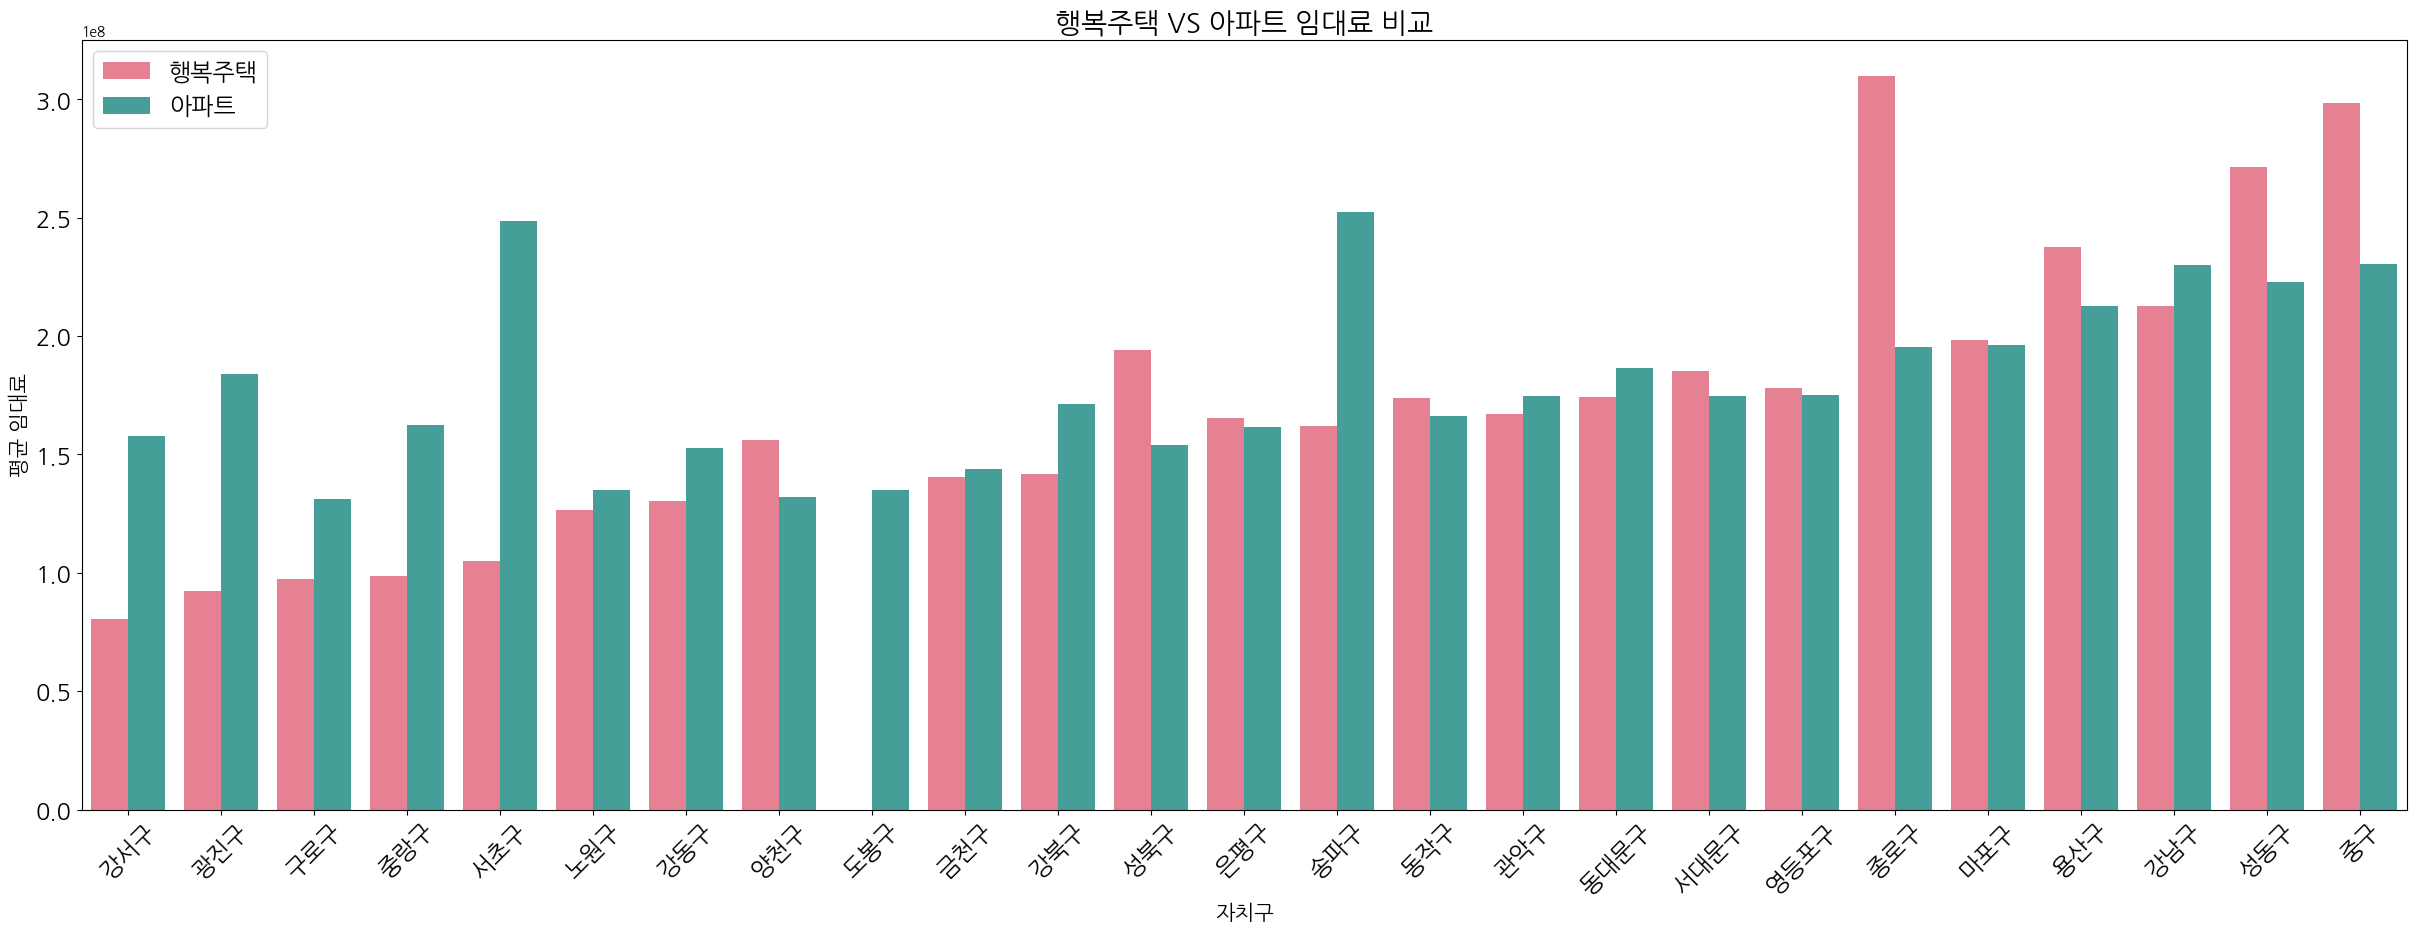

In [127]:
# 행복주택과 아파트의 가격 비교를 위해 필터링
df_compare = df_avg_mean[df_avg_mean['kindRental'].isin(['행복주택', '아파트'])]
df_compare.sort_values(by='mean', inplace=True)

plt.figure(figsize=(30, 10))
sns.barplot(data=df_compare, x='adresGu', y='mean', hue = 'kindRental', palette='husl')

plt.xlabel('자치구', fontsize=15)
plt.ylabel('평균 임대료', fontsize=15)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('행복주택 VS 아파트 임대료 비교', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=17)

plt.show()

In [ ]:
# 민간청년+행복주택 합쳐서 아파트와 비교하기

df_avg_rental = df_avg.groupby(['kindRental'], as_index=False)['Average'].agg(['mean'])
df_avg_mean
#sns.barplot(df['kindRental'])

In [132]:
pwd

'/root/workspace/mini_pjt_realestate'

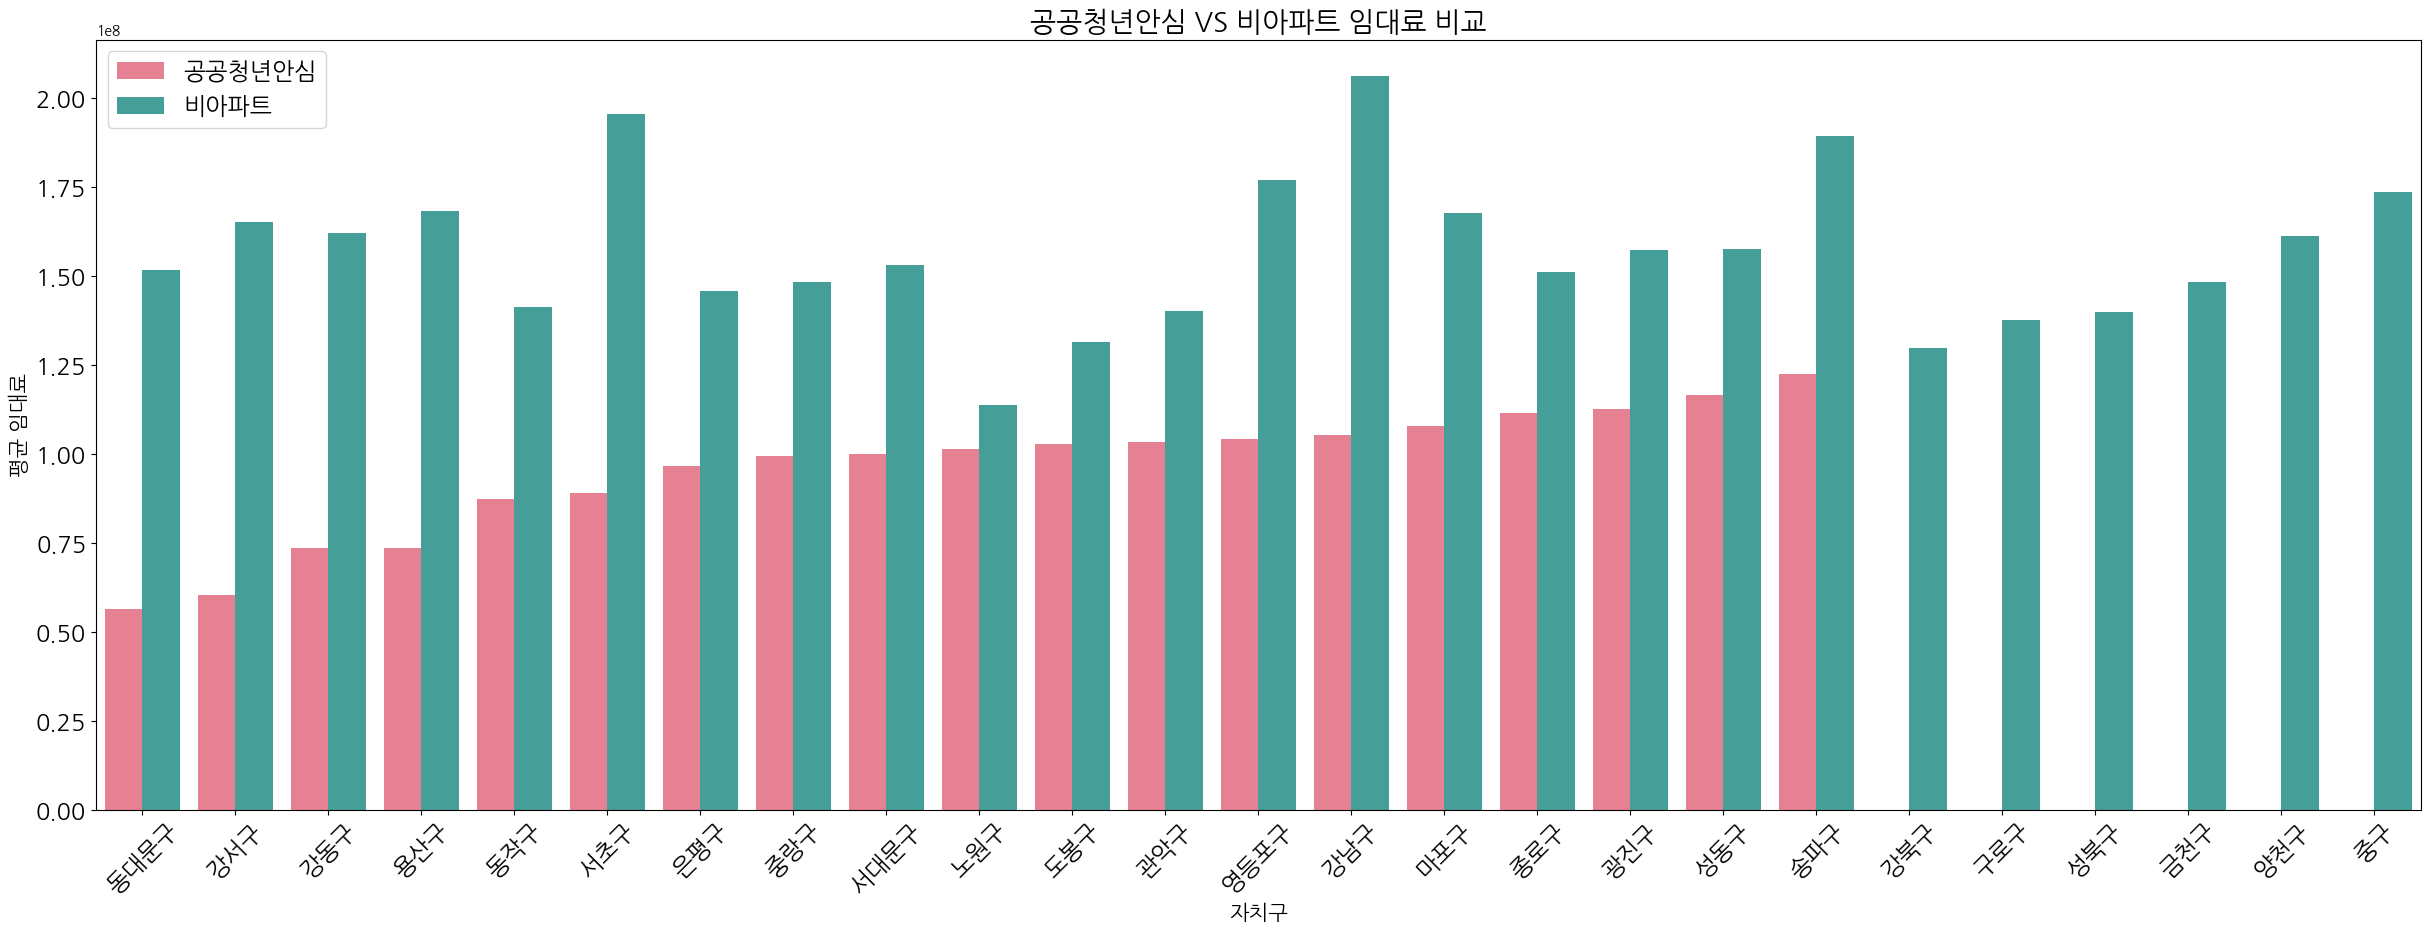

In [130]:
# 매입임대와 비아파트의 가격 비교를 위해 필터링
df_compare = df_avg_mean[df_avg_mean['kindRental'].isin(['공공청년안심', '비아파트'])]
df_compare.sort_values(by='mean', inplace=True)

plt.figure(figsize=(30, 10))
sns.barplot(data=df_compare, x='adresGu', y='mean', hue = 'kindRental', palette='husl')

plt.xlabel('자치구', fontsize=15)
plt.ylabel('평균 임대료', fontsize=15)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('공공청년안심 VS 비아파트 임대료 비교', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=17)

plt.show()

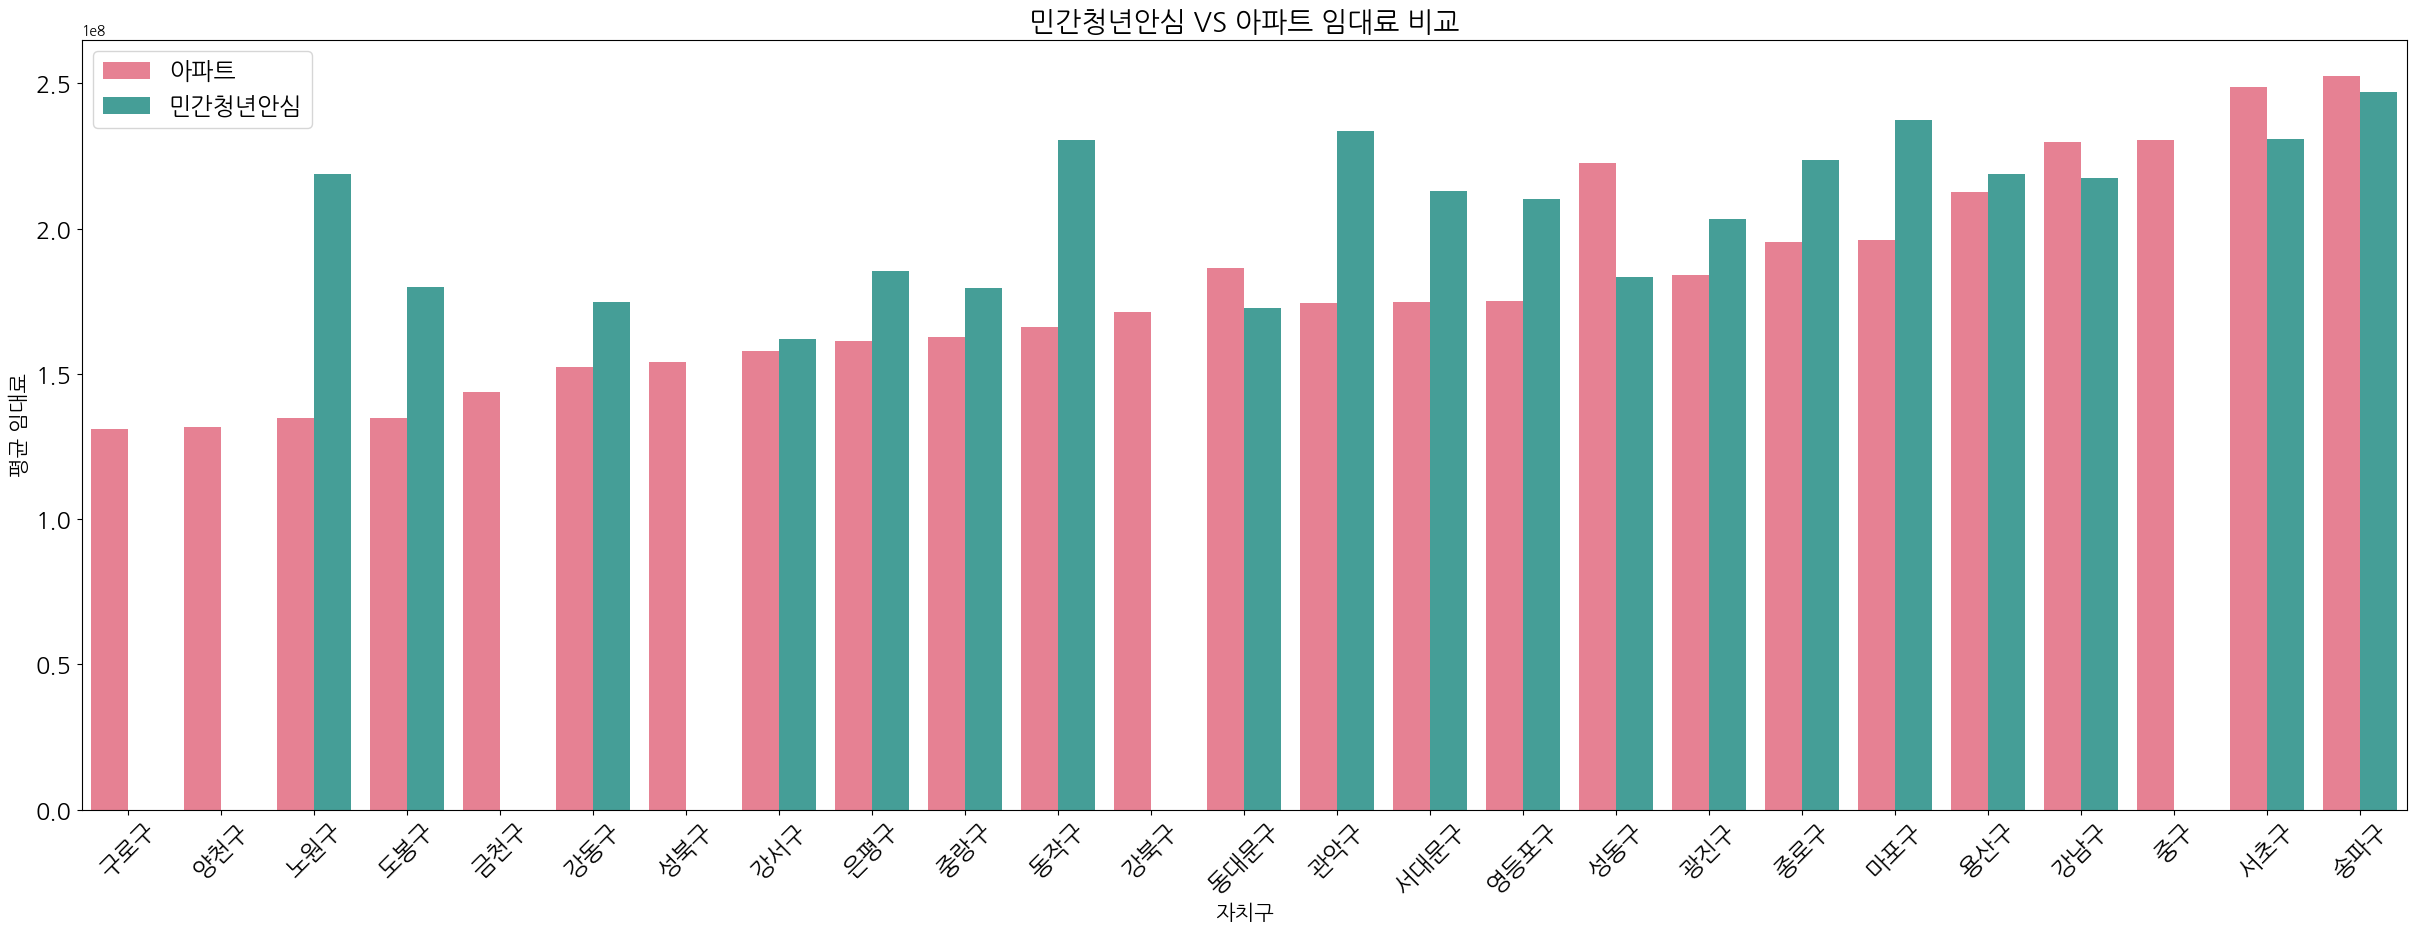

In [131]:
# 민간청년안심과 아파트의 가격 비교를 위해 필터링
df_compare = df_avg_mean[df_avg_mean['kindRental'].isin(['민간청년안심', '아파트'])]
df_compare.sort_values(by='mean', inplace=True)

plt.figure(figsize=(30, 10))
sns.barplot(data=df_compare, x='adresGu', y='mean', hue = 'kindRental', palette='husl')

plt.xlabel('자치구', fontsize=15)
plt.ylabel('평균 임대료', fontsize=15)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title('민간청년안심 VS 아파트 임대료 비교', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=17)

plt.show()

In [ ]:
# 관악구 행복주택, 아파트 목록 확인 
ansim['adresGu'] 


In [95]:
# 평당 가격 구하기

all_rent

,yearReg,adresGu,division,totArea,depositMoney,rentalMoney,kindHouse,divisionContract
0,2023,마포구,월세,31.12000,100000000,400000,오피스텔,신규
1,2023,마포구,월세,33.66000,100000000,550000,오피스텔,갱신
2,2023,서초구,월세,28.80000,10000000,550000,오피스텔,신규
3,2023,동작구,월세,27.99000,140000000,220000,오피스텔,신규
4,2023,영등포구,월세,33.58000,120000000,350000,오피스텔,갱신
...,...,...,...,...,...,...,...,...
160493,2024,강남구,월세,23.60000,3000000,350000,단독다가구,신규
160494,2024,구로구,월세,26.30000,20000000,500000,연립다세대,신규
160495,2024,강남구,월세,24.12000,10000000,800000,오피스텔,신규
160496,2024,마포구,월세,28.01000,170000000,600000,연립다세대,신규
